In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium as f

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [30]:
pd.set_option('display.max_columns', None)

### March - Host Table

In [31]:
df = pd.read_csv('host_3-22.csv')

#data = df.sample(frac = 0.021)

In [32]:
#data.head()
df.head()

,uuid,segmentid,partitionDate,device,timestamp,filedate,filetimeutc,updateTimeMs,sequenceNo,vin,tripId,localTimeMs,latitude,longitude,elevation,heading,gpsspeed,fixtypehvgps,gpssemimajaxis,gpssemiminaxis,gpsorientsemimaj,brakestatus,speed,yawrate,longaccel,throttlepospct,steerangle,turnsignal,headlamp,wiper,transstate,stabilitycontrolstatus,absstatus,traccontrolstatus,gpsUncertaintyArea,gpsUncertainFlag,speedMph,gpsspeedMph,elevationFt,gpssemimajaxisFt,gpssemiminaxisFt,closestintersectid,timestamp_hr,updateTimeMs_hr
0,1646092911664100160,be123bd0843852005af4550ad1848b2d,2022-03-01,160,1646092911664,20220301,151,1678895059000,1,b73ce398c39f506af761d2277d853a92,16020220301151,111664,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253,3.141593e+06,True,2236.93629,2236.93629,3280.8399,3280.8399,3280.8399,0,2022-03-01 00:01:17.824,1970-01-20 10:21:35.059
1,1646092912164200160,be123bd0843852005af4550ad1848b2d,2022-03-01,160,1646092912164,20220301,151,1678895059000,2,b73ce398c39f506af761d2277d853a92,16020220301151,112164,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253,3.141593e+06,True,2236.93629,2236.93629,3280.8399,3280.8399,3280.8399,0,2022-03-01 00:01:17.824,1970-01-20 10:21:35.059
2,1646092912664300160,be123bd0843852005af4550ad1848b2d,2022-03-01,160,1646092912664,20220301,151,1678895059000,3,b73ce398c39f506af761d2277d853a92,16020220301151,112664,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253,3.141593e+06,True,2236.93629,2236.93629,3280.8399,3280.8399,3280.8399,0,2022-03-01 00:01:17.824,1970-01-20 10:21:35.059
3,1646092913164400160,be123bd0843852005af4550ad1848b2d,2022-03-01,160,1646092913164,20220301,151,1678895059000,4,b73ce398c39f506af761d2277d853a92,16020220301151,113164,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253,3.141593e+06,True,2236.93629,2236.93629,3280.8399,3280.8399,3280.8399,0,2022-03-01 00:01:17.824,1970-01-20 10:21:35.059
4,1646092913669500160,be123bd0843852005af4550ad1848b2d,2022-03-01,160,1646092913669,20220301,151,1678895059000,5,b73ce398c39f506af761d2277d853a92,16020220301151,113669,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253,3.141593e+06,True,2236.93629,2236.93629,3280.8399,3280.8399,3280.8399,0,2022-03-01 00:01:17.824,1970-01-20 10:21:35.059


In [33]:
df['timestamp_hr'] = pd.to_datetime(df['timestamp_hr'])

# Filter the DataFrame to include only rows where the date is '2022-03-01'
filtered_df = df[df['timestamp_hr'].dt.date == pd.to_datetime('2022-03-01').date()]

# Display the filtered DataFrame
filtered_df.shape

(458446, 44)

In [38]:
len(df['device'].unique())

128

In [40]:
df['brakestatus'].value_counts()

brakestatus
0.0     7874996
1.0     3838896
59.0          1
32.0          1
Name: count, dtype: int64

In [7]:
# Number of drivers for that one day - 01/03/2022 

len(df['device'].unique())

128

In [8]:
# Filtering out trips with no lat and long values and retaining only the records with values. 
## To plot a graph depicting the route, it is essential to have lat and long points. 

x = filtered_df[filtered_df['latitude'].notna() & filtered_df['longitude'].notna()]
x.tail()

,uuid,segmentid,partitionDate,device,timestamp,filedate,filetimeutc,updateTimeMs,sequenceNo,vin,tripId,localTimeMs,latitude,longitude,elevation,heading,gpsspeed,fixtypehvgps,gpssemimajaxis,gpssemiminaxis,gpsorientsemimaj,brakestatus,speed,yawrate,longaccel,throttlepospct,steerangle,turnsignal,headlamp,wiper,transstate,stabilitycontrolstatus,absstatus,traccontrolstatus,gpsUncertaintyArea,gpsUncertainFlag,speedMph,gpsspeedMph,elevationFt,gpssemimajaxisFt,gpssemiminaxisFt,closestintersectid,timestamp_hr,updateTimeMs_hr
458441,1646179186730335310427,041af3baa4fe91142079aa680cec3490,2022-03-01,10427,1646179186730,20220301,233148,1678895059000,3353,4c6515356f214aa275e07ddbbd922a5e,1042720220301233148,86386730,28.143536,-82.352761,-12.290,96.78784,10.572,2.0,0.46,0.41,137.0,0.0,10.571999,0.308605,1.068755,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,0.592504,False,23.648888,23.648890,-40.321522,1.509186,1.345144,0,2022-03-01 23:58:43.200,1970-01-20 10:21:35.059
458442,1646179187230335410427,041af3baa4fe91142079aa680cec3490,2022-03-01,10427,1646179187230,20220301,233148,1678895059000,3354,4c6515356f214aa275e07ddbbd922a5e,1042720220301233148,86387230,28.143530,-82.352706,-12.348,96.34434,11.132,2.0,0.46,0.41,135.0,0.0,11.132000,-0.861296,1.115408,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,0.592504,False,24.901575,24.901575,-40.511811,1.509186,1.345144,0,2022-03-01 23:58:43.200,1970-01-20 10:21:35.059
458443,1646179187730335510427,041af3baa4fe91142079aa680cec3490,2022-03-01,10427,1646179187730,20220301,233148,1678895059000,3355,4c6515356f214aa275e07ddbbd922a5e,1042720220301233148,86387730,28.143525,-82.352647,-12.414,96.03476,11.739,2.0,0.46,0.42,134.0,0.0,11.739000,-0.812939,1.201770,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,0.606956,False,26.259395,26.259395,-40.728347,1.509186,1.377953,0,2022-03-01 23:58:43.200,1970-01-20 10:21:35.059
458444,1646179188230335610427,041af3baa4fe91142079aa680cec3490,2022-03-01,10427,1646179188230,20220301,233148,1678895059000,3356,4c6515356f214aa275e07ddbbd922a5e,1042720220301233148,86388230,28.143519,-82.352586,-12.454,95.74832,12.241,2.0,0.46,0.42,132.0,0.0,12.241000,-0.560901,1.122021,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,0.606956,False,27.382337,27.382337,-40.859578,1.509186,1.377953,0,2022-03-01 23:58:43.200,1970-01-20 10:21:35.059
458445,1646179188730335710427,041af3baa4fe91142079aa680cec3490,2022-03-01,10427,1646179188730,20220301,233148,1678895059000,3357,4c6515356f214aa275e07ddbbd922a5e,1042720220301233148,86388730,28.143513,-82.352522,-12.512,95.83632,12.836,2.0,0.46,0.42,129.0,0.0,12.836000,-0.290842,1.164775,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,0.606956,False,28.713314,28.713314,-41.049869,1.509186,1.377953,0,2022-03-01 23:58:43.200,1970-01-20 10:21:35.059


### Taknig one trip into consideration with TripId: 1042720220301233148

In [9]:
dm = x[x['tripId'] == 1042720220301233148]
dm.head()

,uuid,segmentid,partitionDate,device,timestamp,filedate,filetimeutc,updateTimeMs,sequenceNo,vin,tripId,localTimeMs,latitude,longitude,elevation,heading,gpsspeed,fixtypehvgps,gpssemimajaxis,gpssemiminaxis,gpsorientsemimaj,brakestatus,speed,yawrate,longaccel,throttlepospct,steerangle,turnsignal,headlamp,wiper,transstate,stabilitycontrolstatus,absstatus,traccontrolstatus,gpsUncertaintyArea,gpsUncertainFlag,speedMph,gpsspeedMph,elevationFt,gpssemimajaxisFt,gpssemiminaxisFt,closestintersectid,timestamp_hr,updateTimeMs_hr
435447,1646177509530110427,041af3baa4fe91142079aa680cec3490,2022-03-01,10427,1646177509530,20220301,233148,1678895059000,1,4c6515356f214aa275e07ddbbd922a5e,1042720220301233148,84709530,27.949972,-82.454201,16.340,74.4043,0.009,1.0,15.0,5.2,82.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,245.044227,True,0.0,0.020132,53.608924,49.212598,17.060367,0,2022-03-01 23:32:30.336,1970-01-20 10:21:35.059
435457,1646177510030210427,041af3baa4fe91142079aa680cec3490,2022-03-01,10427,1646177510030,20220301,233148,1678895059000,2,4c6515356f214aa275e07ddbbd922a5e,1042720220301233148,84710030,27.949971,-82.454201,16.279,74.4043,0.010,1.0,14.0,5.2,82.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,228.707945,True,0.0,0.022369,53.408793,45.931759,17.060367,0,2022-03-01 23:32:30.336,1970-01-20 10:21:35.059
435467,1646177510530310427,041af3baa4fe91142079aa680cec3490,2022-03-01,10427,1646177510530,20220301,233148,1678895059000,3,4c6515356f214aa275e07ddbbd922a5e,1042720220301233148,84710530,27.949971,-82.454201,16.279,74.4043,0.008,1.0,14.0,5.1,82.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,224.309715,True,0.0,0.017895,53.408793,45.931759,16.732283,0,2022-03-01 23:32:30.336,1970-01-20 10:21:35.059
435477,1646177511030410427,041af3baa4fe91142079aa680cec3490,2022-03-01,10427,1646177511030,20220301,233148,1678895059000,4,4c6515356f214aa275e07ddbbd922a5e,1042720220301233148,84711030,27.949971,-82.454201,16.279,74.4043,0.009,1.0,14.0,5.0,82.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,219.911486,True,0.0,0.020132,53.408793,45.931759,16.404200,0,2022-03-01 23:32:30.336,1970-01-20 10:21:35.059
435487,1646177511530510427,041af3baa4fe91142079aa680cec3490,2022-03-01,10427,1646177511530,20220301,233148,1678895059000,5,4c6515356f214aa275e07ddbbd922a5e,1042720220301233148,84711530,27.949971,-82.454201,16.279,74.4043,0.015,1.0,13.0,5.0,82.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,204.203522,True,0.0,0.033554,53.408793,42.650919,16.404200,0,2022-03-01 23:32:30.336,1970-01-20 10:21:35.059


In [41]:
dm['brakestatus'].value_counts()

brakestatus
0.0    2825
1.0     466
Name: count, dtype: int64

In [10]:
# Total trip time: 

dm['timestamp_hr'].iloc[-1] - dm['timestamp_hr'].iloc[1]

Timedelta('0 days 00:26:12.864000')

<Axes: xlabel='timestamp', ylabel='latitude'>

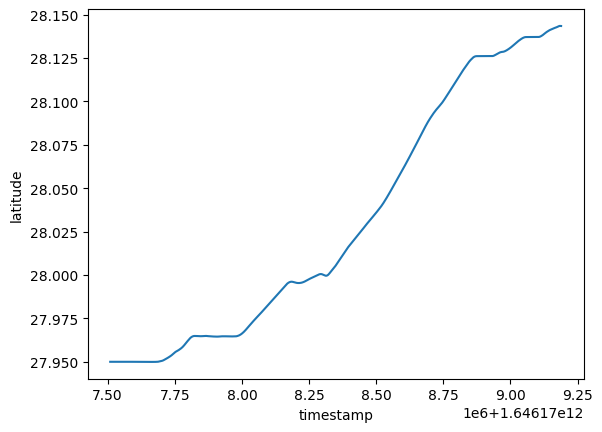

In [11]:
sns.lineplot(data = dm, y = 'latitude', x = 'timestamp')

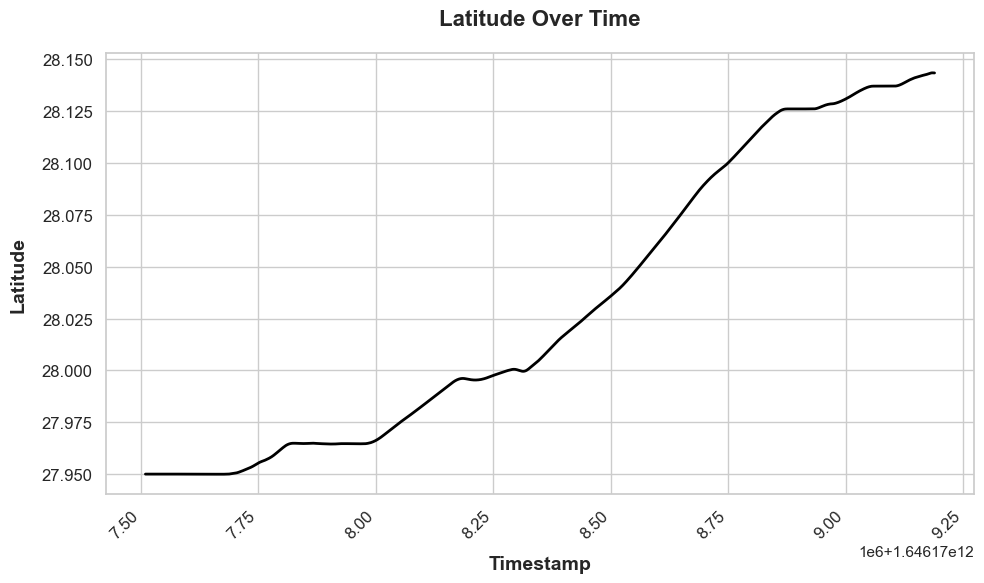

In [164]:
# Set style
sns.set_style("whitegrid")

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=dm, y='latitude', x='timestamp', color='black', linewidth=2)

# Adding labels and title with custom font properties
plt.xlabel('Timestamp', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Latitude', fontsize=14, fontweight='bold', labelpad=10)
plt.title('Latitude Over Time', fontsize=16, fontweight='bold', pad=20)

# Adjusting ticks font size and rotation
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

The above plot: Lat vs Timestamp depicts the change in lat wrt time. The straight stretch represents a straight/almost straight road with no curves which may indicate a highway/expressway.

<Axes: xlabel='timestamp', ylabel='longitude'>

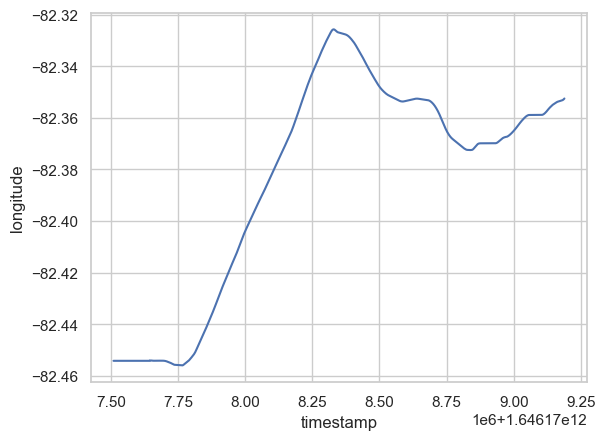

In [162]:

sns.lineplot(data = dm, y = 'longitude', x = 'timestamp')

Similar to Lat vs Timestamp plot, the Long vs Timestamp plot also gives out information about the change in Long wrt Time. The straight stretch also depicts that the road is straight.

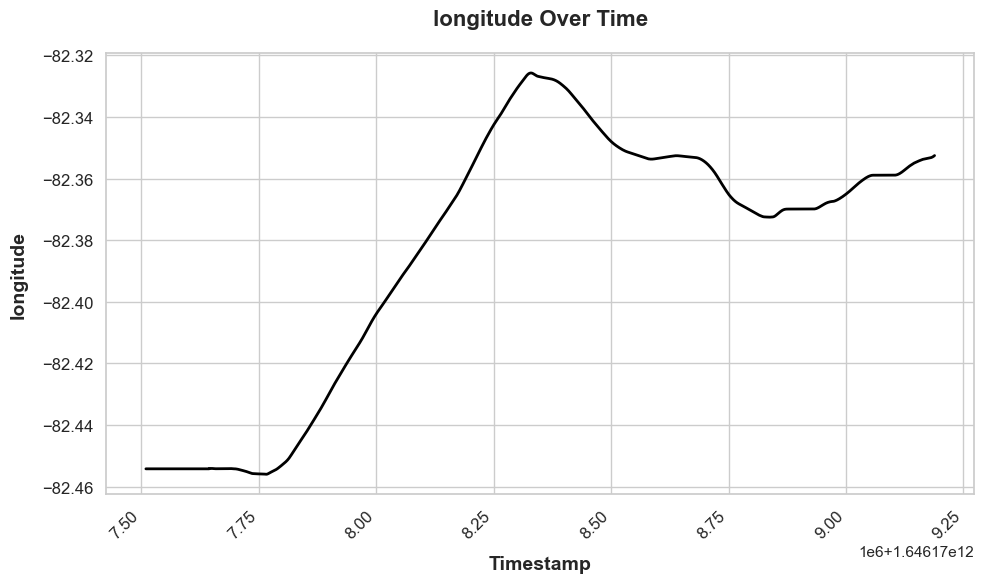

In [166]:
# Set style
sns.set_style("whitegrid")

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=dm, y='longitude', x='timestamp', color='black', linewidth=2)

# Adding labels and title with custom font properties
plt.xlabel('Timestamp', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('longitude', fontsize=14, fontweight='bold', labelpad=10)
plt.title('longitude Over Time', fontsize=16, fontweight='bold', pad=20)

# Adjusting ticks font size and rotation
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

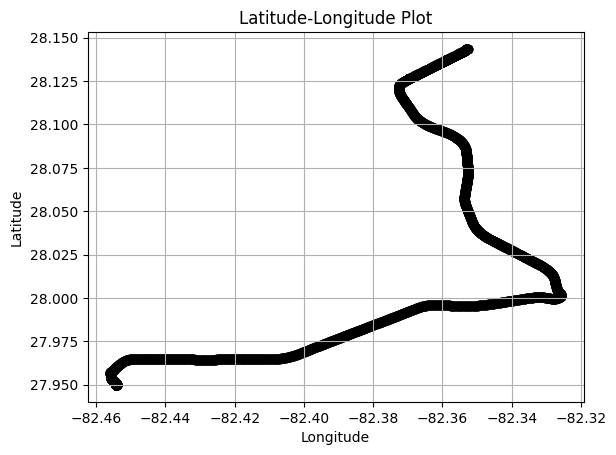

In [13]:
# Route pattern for one trip taking Lat vs Long. 

latitudes_list = dm['latitude']
longitudes_list = dm['longitude']

plt.scatter(longitudes_list, latitudes_list, color = 'black')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude-Longitude Plot')
plt.grid(True)
plt.show()

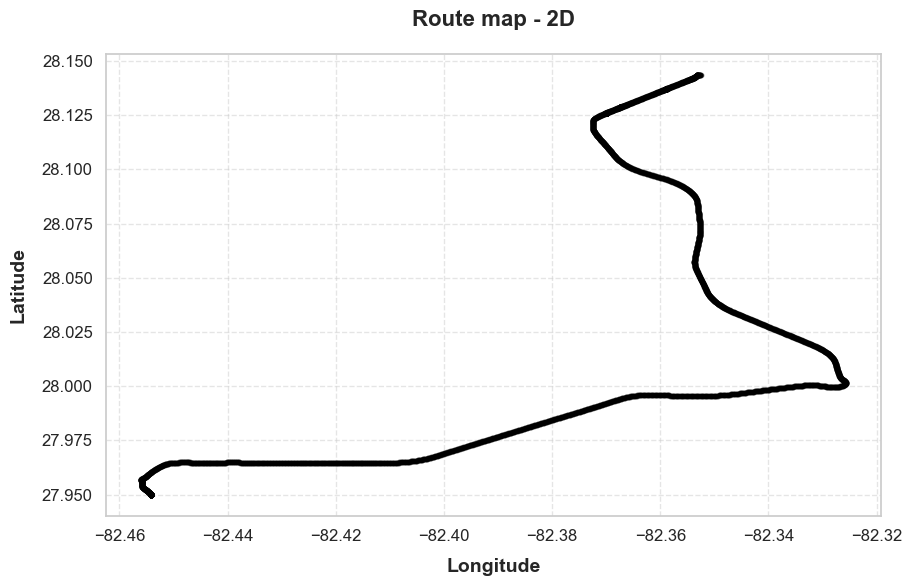

In [169]:
plt.figure(figsize=(10, 6))
plt.scatter(dm['longitude'], dm['latitude'], color='black', alpha=0.5, s=10)

# Adding labels and title with custom font properties
plt.xlabel('Longitude', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Latitude', fontsize=14, fontweight='bold', labelpad=10)
plt.title('Route map - 2D', fontsize=16, fontweight='bold', pad=20)

# Adjusting ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.show()

What can we infer from the above plot? --> The route of the trip.

What can we determine and how? --> Staring and end location of the trip. Nothing much about the lane change criterion.

How can this affect the driving style? --> Need more info


**NOTE: This is only one trip**

In [47]:
# Using Folium



# Create a map centered around a specific location
map = f.Map(location=[27.949972, -82.454201], zoom_start=10)

# Lat and Log for one trip passed as a list  
locations = zip(latitudes_list, longitudes_list)

# Add markers for each latitude-longitude pair
for lat, lon in locations:
    f.Marker([lat, lon]).add_to(map)

# Display the map
map


In [15]:
# dm.columns

'''
'uuid', 'segmentid', 'partitionDate', 'device', 'timestamp', 'filedate',
       'filetimeutc', 'updateTimeMs', 'sequenceNo', 'vin', 'tripId',
       'localTimeMs', 'latitude', 'longitude', 'elevation', 'heading',
       'gpsspeed', 'fixtypehvgps', 'gpssemimajaxis', 'gpssemiminaxis',
       'gpsorientsemimaj', 'brakestatus', 'speed', 'yawrate', 'longaccel',
       'throttlepospct', 'steerangle', 'turnsignal', 'headlamp', 'wiper',
       'transstate', 'stabilitycontrolstatus', 'absstatus',
       'traccontrolstatus', 'gpsUncertaintyArea', 'gpsUncertainFlag',
       'speedMph', 'gpsspeedMph', 'elevationFt', 'gpssemimajaxisFt',
       'gpssemiminaxisFt', 'closestintersectid', 'timestamp_hr',
       'updateTimeMs_hr'
'''

"\n'uuid', 'segmentid', 'partitionDate', 'device', 'timestamp', 'filedate',\n       'filetimeutc', 'updateTimeMs', 'sequenceNo', 'vin', 'tripId',\n       'localTimeMs', 'latitude', 'longitude', 'elevation', 'heading',\n       'gpsspeed', 'fixtypehvgps', 'gpssemimajaxis', 'gpssemiminaxis',\n       'gpsorientsemimaj', 'brakestatus', 'speed', 'yawrate', 'longaccel',\n       'throttlepospct', 'steerangle', 'turnsignal', 'headlamp', 'wiper',\n       'transstate', 'stabilitycontrolstatus', 'absstatus',\n       'traccontrolstatus', 'gpsUncertaintyArea', 'gpsUncertainFlag',\n       'speedMph', 'gpsspeedMph', 'elevationFt', 'gpssemimajaxisFt',\n       'gpssemiminaxisFt', 'closestintersectid', 'timestamp_hr',\n       'updateTimeMs_hr'\n"

In [16]:
features = ['uuid', 'partitionDate', 'device', 'timestamp', 'sequenceNo', 'vin', 'tripId',
       'localTimeMs', 'latitude', 'longitude', 'elevation', 'heading',
       'gpsspeed', 'fixtypehvgps', 'gpssemimajaxis', 'gpssemiminaxis',
       'gpsorientsemimaj', 'brakestatus', 'speed', 'yawrate', 'longaccel',
       'throttlepospct', 'steerangle', 'turnsignal', 'headlamp', 'wiper',
       'transstate', 'stabilitycontrolstatus', 'absstatus',
       'traccontrolstatus', 'speedMph', 'gpsspeedMph', 'elevationFt', 'closestintersectid', 'timestamp_hr',
       'updateTimeMs_hr']

In [17]:
updated_df = dm[features].copy()
updated_df.head()

,uuid,partitionDate,device,timestamp,sequenceNo,vin,tripId,localTimeMs,latitude,longitude,elevation,heading,gpsspeed,fixtypehvgps,gpssemimajaxis,gpssemiminaxis,gpsorientsemimaj,brakestatus,speed,yawrate,longaccel,throttlepospct,steerangle,turnsignal,headlamp,wiper,transstate,stabilitycontrolstatus,absstatus,traccontrolstatus,speedMph,gpsspeedMph,elevationFt,closestintersectid,timestamp_hr,updateTimeMs_hr
435447,1646177509530110427,2022-03-01,10427,1646177509530,1,4c6515356f214aa275e07ddbbd922a5e,1042720220301233148,84709530,27.949972,-82.454201,16.340,74.4043,0.009,1.0,15.0,5.2,82.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,0.0,0.020132,53.608924,0,2022-03-01 23:32:30.336,1970-01-20 10:21:35.059
435457,1646177510030210427,2022-03-01,10427,1646177510030,2,4c6515356f214aa275e07ddbbd922a5e,1042720220301233148,84710030,27.949971,-82.454201,16.279,74.4043,0.010,1.0,14.0,5.2,82.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,0.0,0.022369,53.408793,0,2022-03-01 23:32:30.336,1970-01-20 10:21:35.059
435467,1646177510530310427,2022-03-01,10427,1646177510530,3,4c6515356f214aa275e07ddbbd922a5e,1042720220301233148,84710530,27.949971,-82.454201,16.279,74.4043,0.008,1.0,14.0,5.1,82.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,0.0,0.017895,53.408793,0,2022-03-01 23:32:30.336,1970-01-20 10:21:35.059
435477,1646177511030410427,2022-03-01,10427,1646177511030,4,4c6515356f214aa275e07ddbbd922a5e,1042720220301233148,84711030,27.949971,-82.454201,16.279,74.4043,0.009,1.0,14.0,5.0,82.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,0.0,0.020132,53.408793,0,2022-03-01 23:32:30.336,1970-01-20 10:21:35.059
435487,1646177511530510427,2022-03-01,10427,1646177511530,5,4c6515356f214aa275e07ddbbd922a5e,1042720220301233148,84711530,27.949971,-82.454201,16.279,74.4043,0.015,1.0,13.0,5.0,82.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,0.0,0.033554,53.408793,0,2022-03-01 23:32:30.336,1970-01-20 10:21:35.059


<Axes: xlabel='timestamp', ylabel='speedMph'>

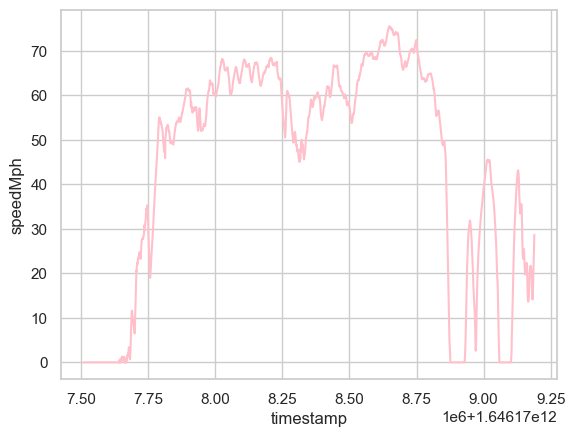

In [158]:
#sns.lineplot(data = updated_df, x = 'timestamp', y = 'speed', color = 'black')
#sns.lineplot(data = updated_df, x = 'timestamp', y = 'gpsspeed', color = 'blue')

sns.lineplot(data = updated_df, x = 'timestamp', y = 'speedMph', color = 'pink')
#sns.lineplot(data = updated_df, x = 'timestamp', y = 'gpsspeedMph', color = 'gray')

In [26]:
updated_df['acc'] = updated_df['speedMph']/0.5
updated_df[['timestamp_hr', 'speed', 'speedMph', 'acc']]

,timestamp_hr,speed,speedMph,acc
435447,2022-03-01 23:32:30.336,0.000000,0.000000,0.000000
435457,2022-03-01 23:32:30.336,0.000000,0.000000,0.000000
435467,2022-03-01 23:32:30.336,0.000000,0.000000,0.000000
435477,2022-03-01 23:32:30.336,0.000000,0.000000,0.000000
435487,2022-03-01 23:32:30.336,0.000000,0.000000,0.000000
...,...,...,...,...
458441,2022-03-01 23:58:43.200,10.571999,23.648888,47.297776
458442,2022-03-01 23:58:43.200,11.132000,24.901575,49.803150
458443,2022-03-01 23:58:43.200,11.739000,26.259395,52.518790
458444,2022-03-01 23:58:43.200,12.241000,27.382337,54.764674


<Axes: xlabel='timestamp', ylabel='acc'>

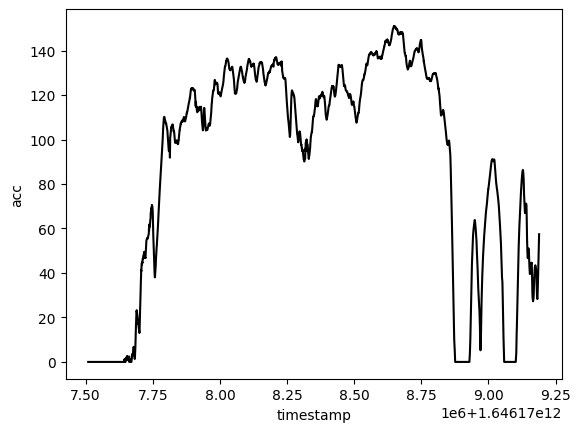

In [27]:
sns.lineplot(data = updated_df, x = 'timestamp', y = 'acc', color = 'black')

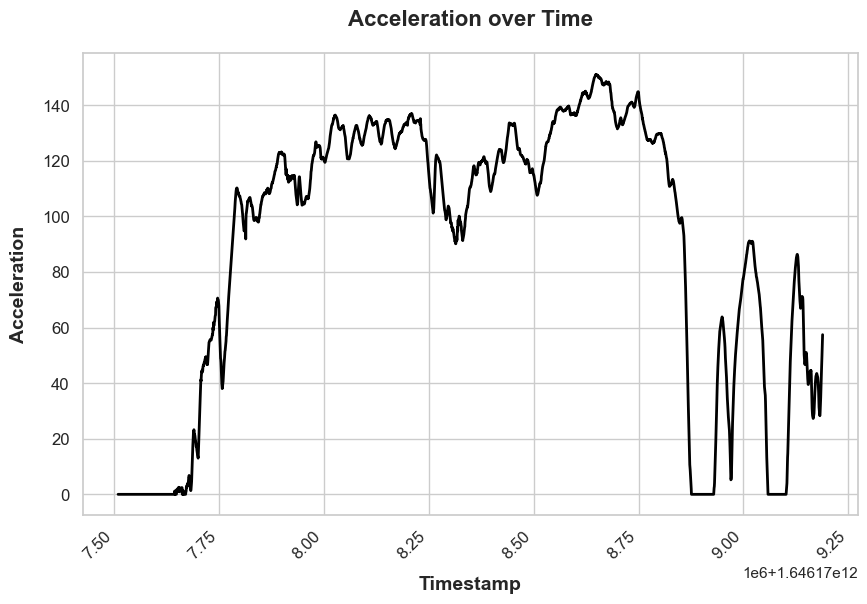

In [157]:
# Set style
sns.set_style("whitegrid")

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=updated_df, x='timestamp', y='acc', color='black', linewidth=2)

# Adding labels and title with custom font properties
plt.xlabel('Timestamp', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Acceleration', fontsize=14, fontweight='bold', labelpad=10)
plt.title('Acceleration over Time', fontsize=16, fontweight='bold', pad=20)

# Adjusting ticks font size
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)

# Show plot
plt.show()

In [ ]:
updated_df[['speed', 'gpsspeed', 'speedMph', 'gpsspeedMph']].describe().T

,count,mean,std,min,25%,50%,75%,max
speed,3291.0,20.332831,10.971794,0.000000,12.121500,24.915000,28.954501,33.768000
gpsspeed,3291.0,20.335746,10.966397,0.002000,12.121500,24.915000,28.954500,33.768000
speedMph,3291.0,45.483248,24.543204,0.000000,27.115023,55.733268,64.769374,75.536865
gpsspeedMph,3291.0,45.489768,24.531131,0.004474,27.115023,55.733268,64.769372,75.536865


In [ ]:
updated_df['steerangle'].value_counts()

steerangle
0.0    3291
Name: count, dtype: int64

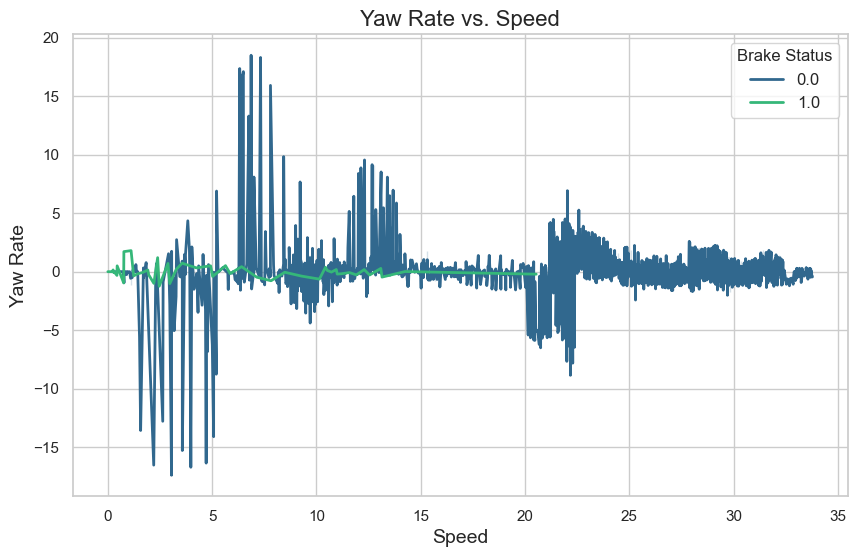

In [130]:
# sns.lineplot(data = updated_df, x = 'speed', y = 'yawrate', hue = 'brakestatus')



# Set style
sns.set_style("whitegrid")

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=updated_df, x='speed', y='yawrate', hue='brakestatus', palette='viridis', linewidth=2)

# Adding labels and title
plt.xlabel('Speed', fontsize=14)
plt.ylabel('Yaw Rate', fontsize=14)
plt.title('Yaw Rate vs. Speed', fontsize=16)

# Adding legend
plt.legend(title='Brake Status', fontsize=12)

# Show plot
plt.show()

Yawrate: Refers to the rate of rotation around the verticle axis of a vehicle. 

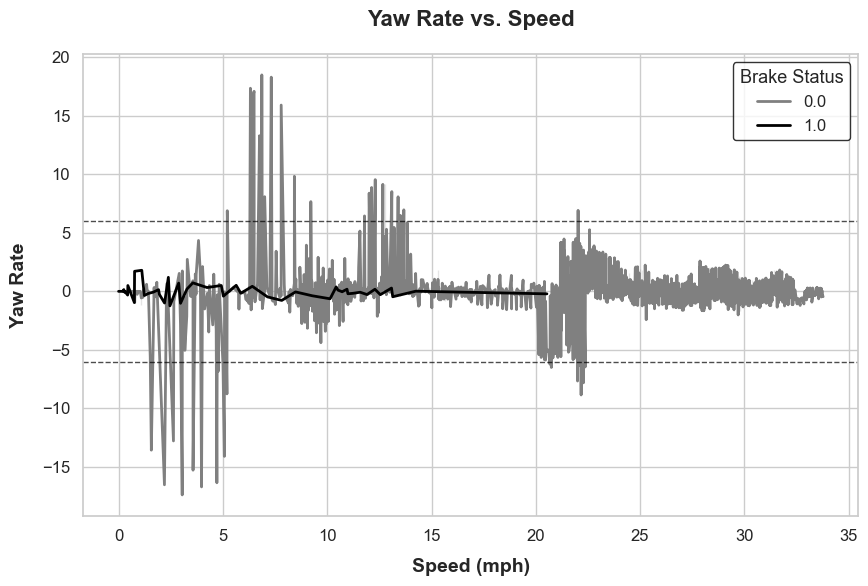

In [156]:
cu_colors = ["gray", "black"]

# Set style
sns.set_style("whitegrid")

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=updated_df, x='speed', y='yawrate', hue='brakestatus', palette=cu_colors, linewidth=2)

# Adding labels and title with custom font properties
plt.xlabel('Speed (mph)', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Yaw Rate', fontsize=14, fontweight='bold', labelpad=10)
plt.title('Yaw Rate vs. Speed', fontsize=16, fontweight='bold', pad=20)

# Adding legend with custom position and font properties
plt.legend(title='Brake Status', fontsize=12, title_fontsize='13', edgecolor='black')
plt.axhline(y=6, color='black', linestyle='--', linewidth=1, alpha=0.7)
plt.axhline(y=-6, color='black', linestyle='--', linewidth=1, alpha=0.7)


# Adjusting ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()

In [ ]:
# Calculate yaw angle relative to x axis
def calculate_angle_from_yaw(yaw_rate):
    # Ensure yaw_angle is within the range [0, 2*pi)
    yaw_rate = yaw_rate % (2 * np.pi)

    # Convert yaw angle to angle in degrees
    angle_degrees = np.degrees(yaw_rate)

    # Calculate angle with respect to the positive x-axis
    angle_with_x_axis = 90 - angle_degrees

    # Ensure the result is within the range [0, 360)
    angle_with_x_axis = angle_with_x_axis % 360

    return angle_with_x_axis

In [ ]:
# # Plotting Vehicle Orientation:
# fig, ax = plt.subplots(figsize=(12,12))
# for i,row in df2[feature_cols].iterrows():
#     plt.plot(row['latitude'], row['longitude'], marker=(3, 0, row['yaw_angle']), markersize=10, linestyle='None')
# plt.title('Vehicle Orientation along Path')
# plt.xlabel('Latitude')
# plt.ylabel('Longitude')
# plt.show()
# df['yaw_angle'] = df.apply(lambda x: calculate_angle_from_yaw(x['yawrate']), axis=1)

In [ ]:
updated_df['steer_angle'] = updated_df['yawrate'].apply(lambda x: calculate_angle_from_yaw(x))


<Axes: xlabel='speed', ylabel='steer_angle'>

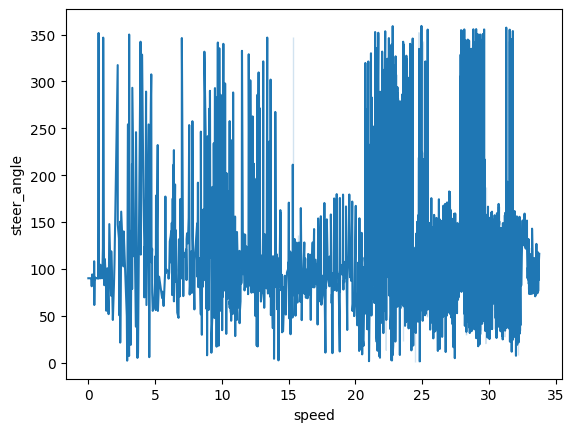

In [ ]:
sns.lineplot(data = updated_df, x = 'speed', y = 'steer_angle')

In [ ]:
corr = updated_df[['steerangle', 'yawrate']].corr()
print(corr)

            steerangle  yawrate
steerangle         NaN      NaN
yawrate            NaN      1.0


<Axes: xlabel='speedMph', ylabel='elevation'>

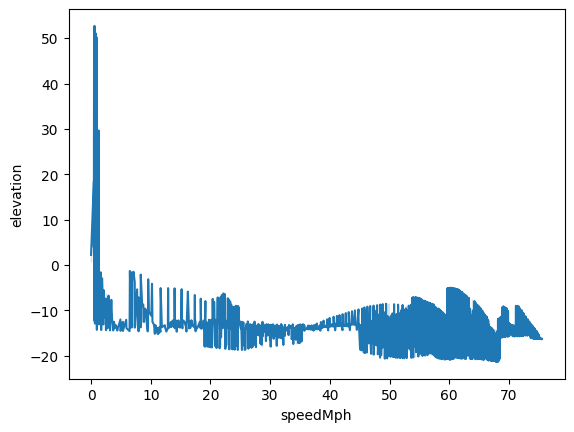

In [51]:
sns.lineplot(data = updated_df, x = 'speedMph', y = 'elevation')

In [75]:
# Aggrigating trips in the month of March:
df_160 = df[df['device'] == 160]
df_160.head()

,uuid,segmentid,partitionDate,device,timestamp,filedate,filetimeutc,updateTimeMs,sequenceNo,vin,tripId,localTimeMs,latitude,longitude,elevation,heading,gpsspeed,fixtypehvgps,gpssemimajaxis,gpssemiminaxis,gpsorientsemimaj,brakestatus,speed,yawrate,longaccel,throttlepospct,steerangle,turnsignal,headlamp,wiper,transstate,stabilitycontrolstatus,absstatus,traccontrolstatus,gpsUncertaintyArea,gpsUncertainFlag,speedMph,gpsspeedMph,elevationFt,gpssemimajaxisFt,gpssemiminaxisFt,closestintersectid,timestamp_hr,updateTimeMs_hr
0,1646092911664100160,be123bd0843852005af4550ad1848b2d,2022-03-01,160,1646092911664,20220301,151,1678895059000,1,b73ce398c39f506af761d2277d853a92,16020220301151,111664,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253,3.141593e+06,True,2236.93629,2236.93629,3280.8399,3280.8399,3280.8399,0,2022-03-01 00:01:17.824,1970-01-20 10:21:35.059
1,1646092912164200160,be123bd0843852005af4550ad1848b2d,2022-03-01,160,1646092912164,20220301,151,1678895059000,2,b73ce398c39f506af761d2277d853a92,16020220301151,112164,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253,3.141593e+06,True,2236.93629,2236.93629,3280.8399,3280.8399,3280.8399,0,2022-03-01 00:01:17.824,1970-01-20 10:21:35.059
2,1646092912664300160,be123bd0843852005af4550ad1848b2d,2022-03-01,160,1646092912664,20220301,151,1678895059000,3,b73ce398c39f506af761d2277d853a92,16020220301151,112664,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253,3.141593e+06,True,2236.93629,2236.93629,3280.8399,3280.8399,3280.8399,0,2022-03-01 00:01:17.824,1970-01-20 10:21:35.059
3,1646092913164400160,be123bd0843852005af4550ad1848b2d,2022-03-01,160,1646092913164,20220301,151,1678895059000,4,b73ce398c39f506af761d2277d853a92,16020220301151,113164,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253,3.141593e+06,True,2236.93629,2236.93629,3280.8399,3280.8399,3280.8399,0,2022-03-01 00:01:17.824,1970-01-20 10:21:35.059
4,1646092913669500160,be123bd0843852005af4550ad1848b2d,2022-03-01,160,1646092913669,20220301,151,1678895059000,5,b73ce398c39f506af761d2277d853a92,16020220301151,113669,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253,3.141593e+06,True,2236.93629,2236.93629,3280.8399,3280.8399,3280.8399,0,2022-03-01 00:01:17.824,1970-01-20 10:21:35.059


In [76]:
len(df_160['tripId'].unique())

42

In [77]:
features = ['timestamp_hr', 'speedMph', 'brakestatus', 'yawrate', 'tripId']

In [78]:
df160 = df_160[features].copy()

In [79]:
df160.head()

,timestamp_hr,speedMph,brakestatus,yawrate,tripId
0,2022-03-01 00:01:17.824,2236.93629,NaN,NaN,16020220301151
1,2022-03-01 00:01:17.824,2236.93629,NaN,NaN,16020220301151
2,2022-03-01 00:01:17.824,2236.93629,NaN,NaN,16020220301151
3,2022-03-01 00:01:17.824,2236.93629,NaN,NaN,16020220301151
4,2022-03-01 00:01:17.824,2236.93629,NaN,NaN,16020220301151


In [96]:
df160[df160['tripId'] == 16020220301151]['brakestatus'].value_counts()

brakestatus
0.0    4045
1.0     221
Name: count, dtype: int64

In [92]:
# There are 42 unique trips for this driver in the month of March. 
## Grouping by the tripId and aggregaing using calculating the avg of speed, count of brakestatus and yawrate.

res = df160.groupby('tripId').agg(
    speedMph=('speedMph', 'mean'),
    brakestatus_0_count=('brakestatus', lambda x: (x == 0).sum()),
    brakestatus_1_count=('brakestatus', lambda x: (x == 1).sum()),
    yawrate=('yawrate', 'mean')
).reset_index()

res

,tripId,speedMph,brakestatus_0_count,brakestatus_1_count,yawrate
0,16020220301151,65.367104,4045,221,0.560318
1,16020220330418,137.416709,68,44,-4.357489
2,16020220330540,47.636898,1514,367,0.971226
3,160202203015738,57.880726,220,123,-0.258391
4,160202203023450,29.294629,1492,553,0.254870
5,160202203031537,354.544615,34,0,-4.365824
6,160202203244007,48.486004,321,142,1.614582
7,160202203261729,33.044854,635,236,0.187225
8,160202203294005,41.883359,677,178,1.422853
9,160202203302751,54.267265,445,61,1.135769


In [113]:
# Using these column to create a clustering analysis for that particular driver:
ft = res.columns[1:]
print(ft)

X = res[ft]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Index(['speedMph', 'brakestatus_0_count', 'brakestatus_1_count', 'yawrate',
       'cluster'],
      dtype='object')


In [114]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
res['cluster'] = kmeans.fit_predict(X_scaled)

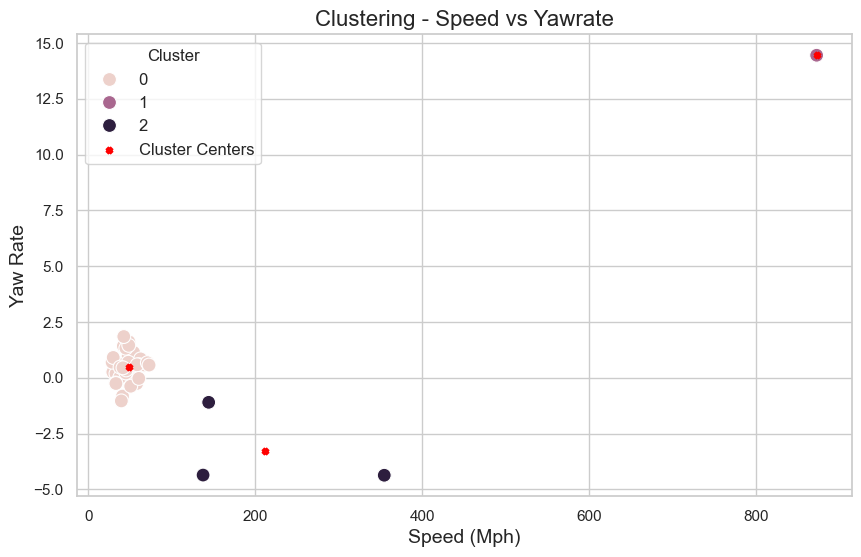

In [124]:
# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(x='speedMph', y='yawrate', hue='cluster', data=res, s=100)

# Plotting cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 3], marker='x', s=15, color='red', linewidth=3, label='Cluster Centers')

# Adding labels and legend
plt.xlabel('Speed (Mph)', fontsize=14)
plt.ylabel('Yaw Rate', fontsize=14)
plt.title('Clustering - Speed vs Yawrate', fontsize=16)
plt.legend(title='Cluster', fontsize=12)


## QUESTIONS TO ANSWER

1. How do we determine the score? - What is the approach?
2. What factors determine the scoring profile? -- Speed? Lane change? 
3. Weather integration. 


-> Lane change? Think about how lane changing can be plotted. How do they play a role when it comes to identifying to bad/good driving?\
        -> Are there libraries that plot a lane with different lanes to viz any changing pattern?